In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df = pd.read_csv('random_timetable2.csv', sep=';', encoding='cp1251')
df.head()

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
0,101,пн,1,Мат Анализ,Иванов,Лекция,Васильевский остров,211
1,101,пн,2,Английский,Шептунов,Практика,Васильевский остров,213
2,101,пн,3,ОП,Рахимов,Лекция,Васильевский остров,203
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф,204
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф,207


# Список преподавателей, обучающих выбранную группу/ведущих выбранную дисциплину

In [11]:
number = int(input())
print(pd.unique(df[df['Номер группы'] == number]['Преподаватель']))

105
['Исаев' 'Рахимов' 'Авдеев' 'Мракова' 'Купетов' 'Петров' 'Сорокин']


In [13]:
lesson = input()
print(pd.unique(df[df['Предмет'] == lesson]['Преподаватель']))

Алгебра
['Заболотный' 'Авдеев']


# Общая занятость преподавателей на факультете/в университете

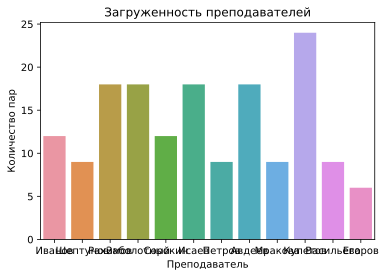

In [15]:
sns.countplot(df['Преподаватель']);
plt.ylabel('Количество пар');
plt.title('Загруженность преподавателей');

# Занятость определенных преподавателей

In [16]:
teacherName = input()

Заболотный


In [17]:
# Посмотреть список всех пар преподавателя на неделе
df[df['Преподаватель'] == teacherName].head(10)

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф,204
5,101,вт,3,Алгебра,Заболотный,Практика,Петергоф,206
11,101,чт,3,Алгебра,Заболотный,Лекция,Петергоф,209
19,102,пн,2,Алгебра,Заболотный,Лекция,Петергоф,214
21,102,вт,2,Алгебра,Заболотный,Практика,Васильевский остров,210
35,102,сб,3,Алгебра,Заболотный,Лекция,Петергоф,206
43,103,ср,1,Алгебра,Заболотный,Лекция,Васильевский остров,213
48,103,пт,2,Алгебра,Заболотный,Лекция,Петергоф,208
53,103,сб,4,Алгебра,Заболотный,Практика,Петергоф,211
112,107,вт,1,Алгебра,Заболотный,Лекция,Петергоф,205


In [18]:
# Посмотреть количество пар в неделю для отдельного преподавателя
df[df['Преподаватель'] == teacherName]['День'].count()

18

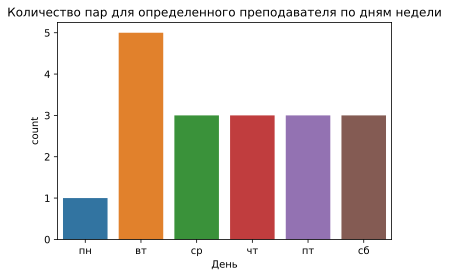

In [19]:
df = pd.concat([df[df['День'] == 'пн'], df[df['День'] == 'вт'], df[df['День'] == 'ср'], df[df['День'] == 'чт'], df[df['День'] == 'пт'], df[df['День'] == 'сб']], ignore_index=True)
sns.countplot(df[df['Преподаватель'] == teacherName]['День']);
plt.title('Количество пар для определенного преподавателя по дням недели');